In [3]:
import librosa
import librosa.display
from os import path
from sortSounds import convert_samples_to_mfcc
from splitTransients import get_transient_locations
import matplotlib.pyplot as plt
import numpy as np

from config import assets

In [2]:
sound_file = path.join(assets, 'sound-files/first-four-seconds.wav')
midi_file = path.join(assets, 'midi/first-four-seconds.mid')
sr = 44100
y, sr = librosa.load(sound_file, sr=sr)
locations = get_transient_locations(y, midi_file)
mfccs, delta_mfccs, delta2_mfccs = convert_samples_to_mfcc(y, sr, locations)


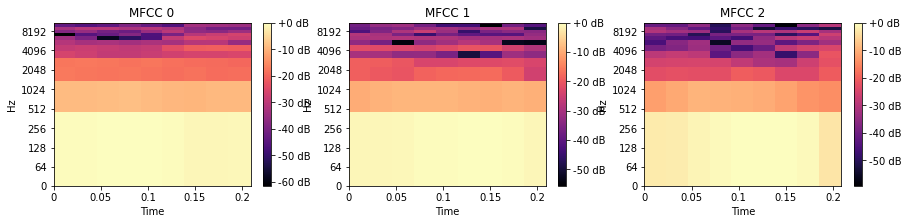

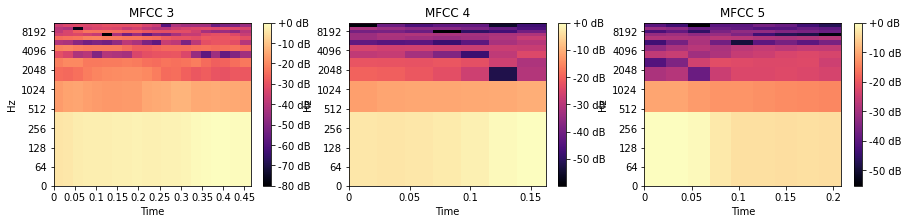

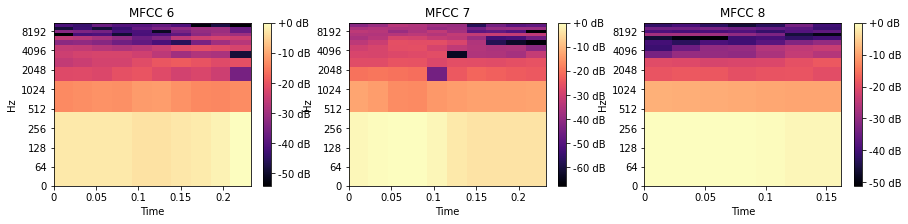

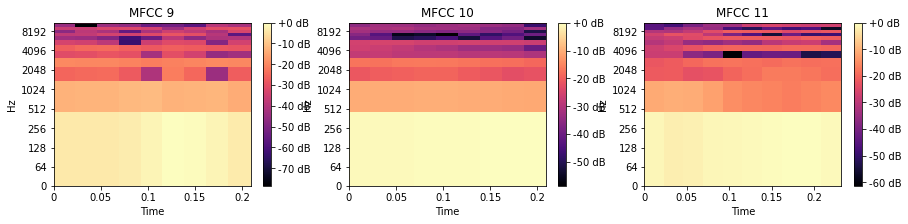

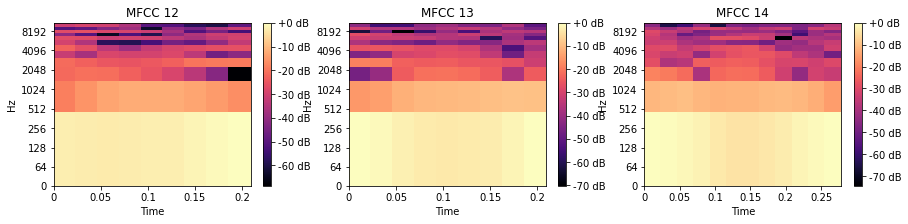

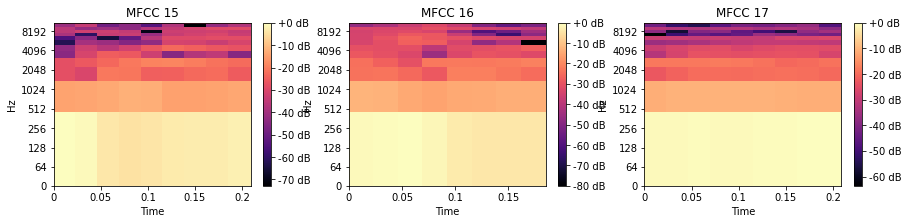

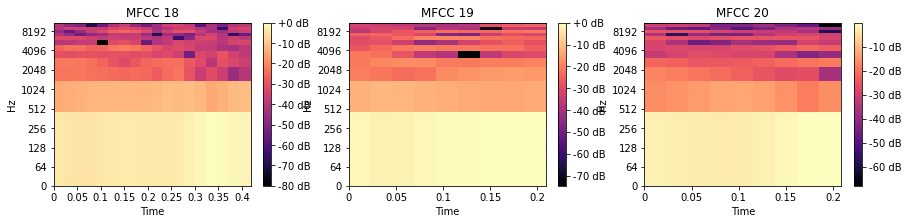

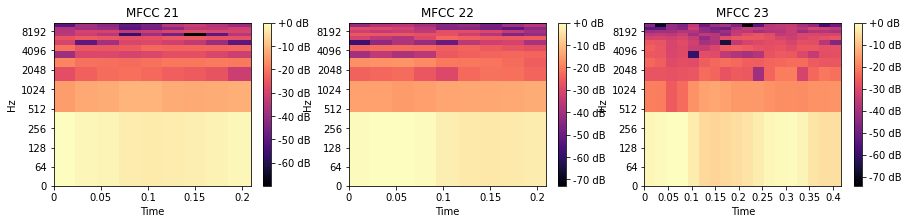

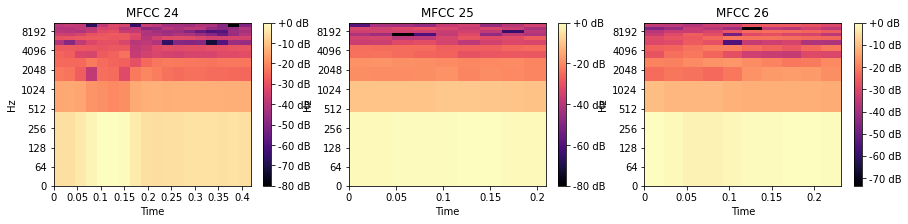

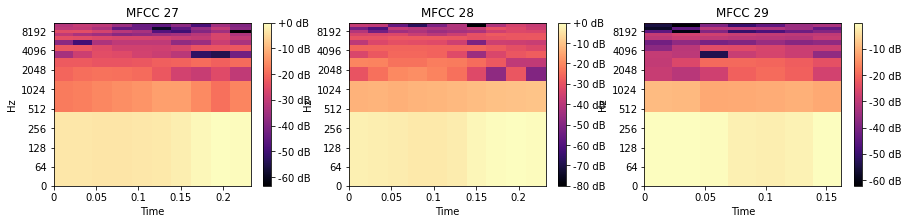

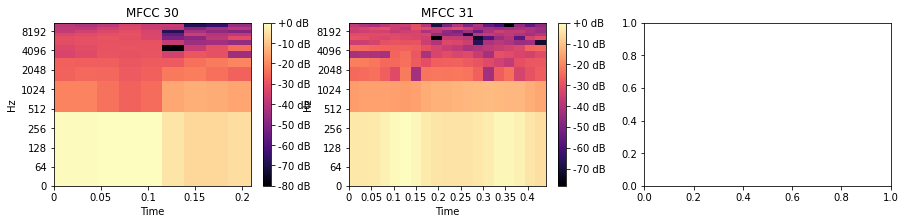

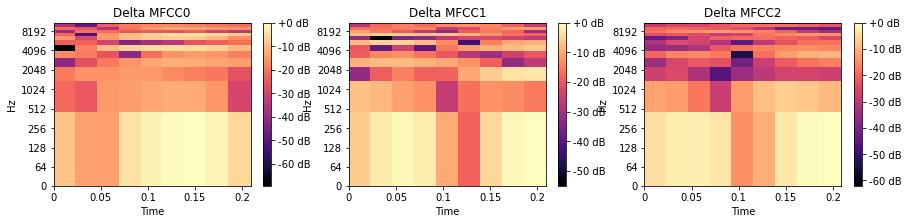

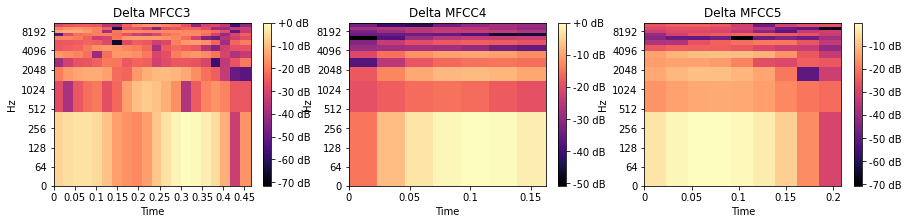

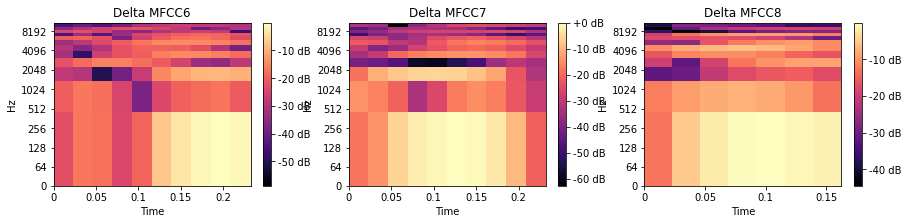

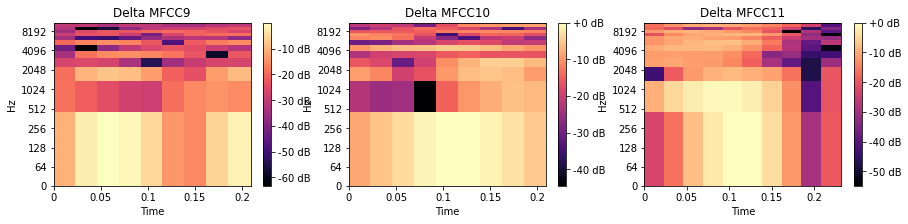

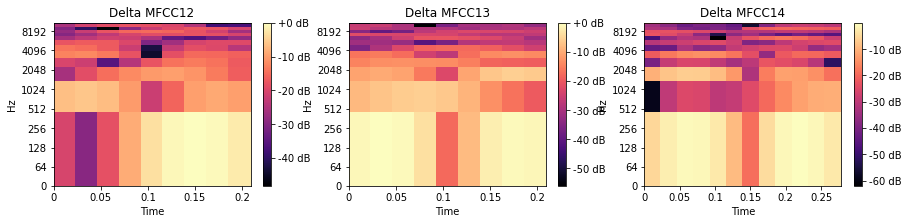

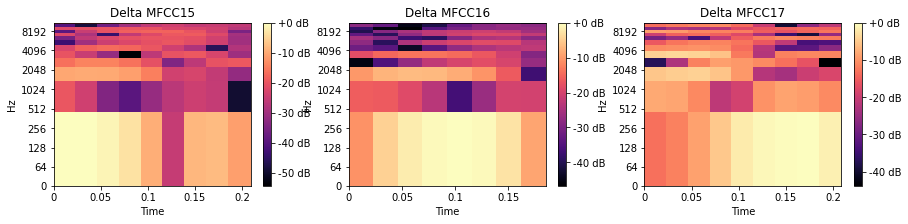

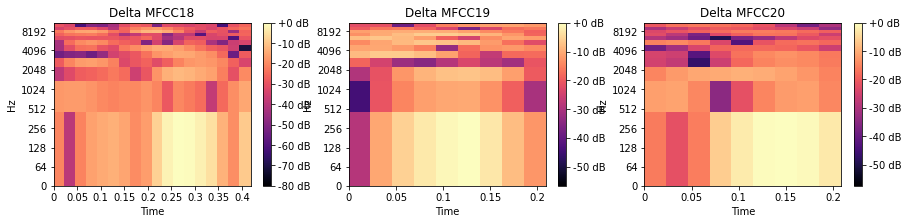

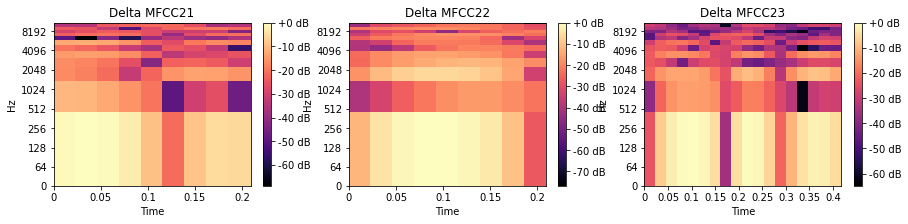

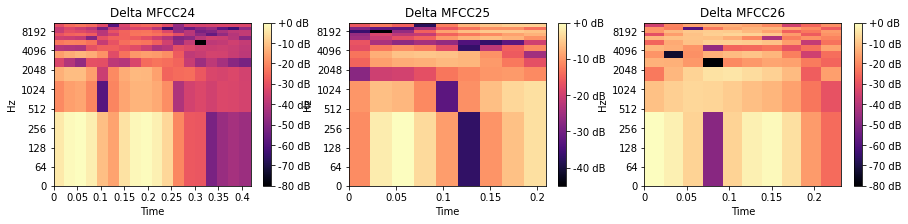

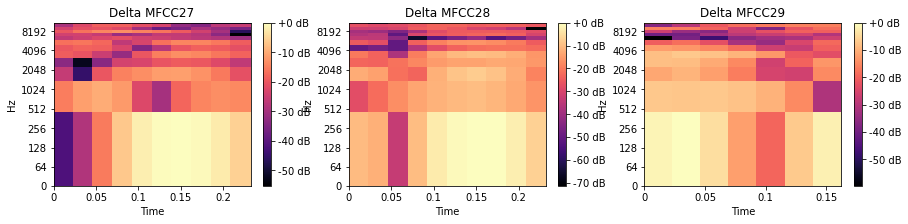

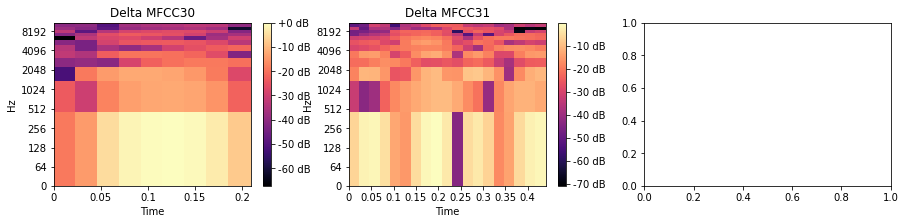

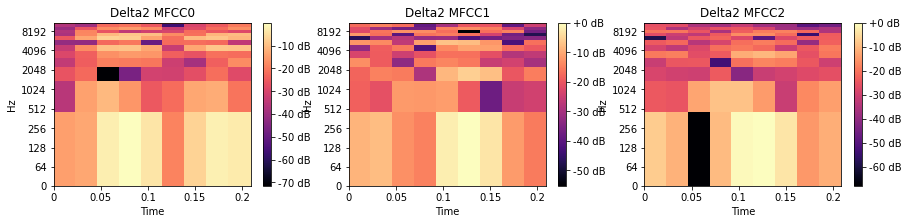

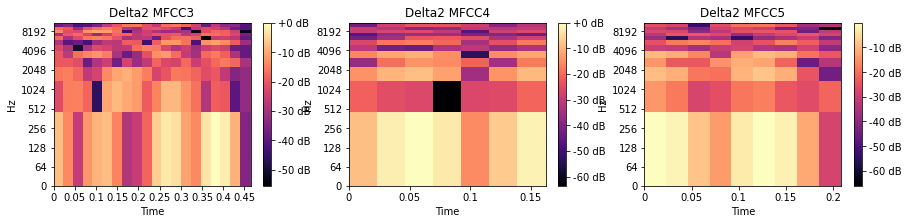

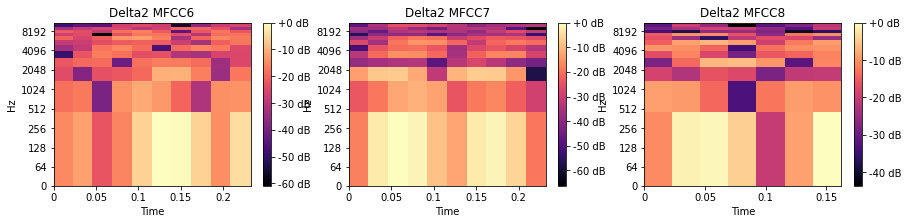

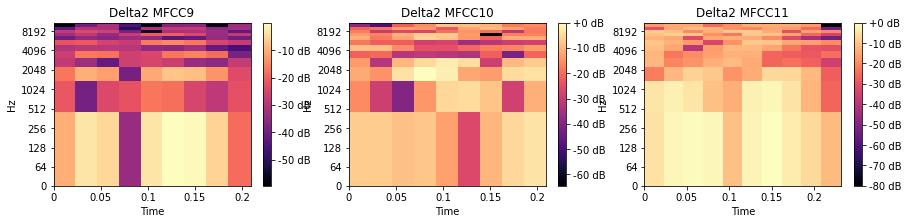

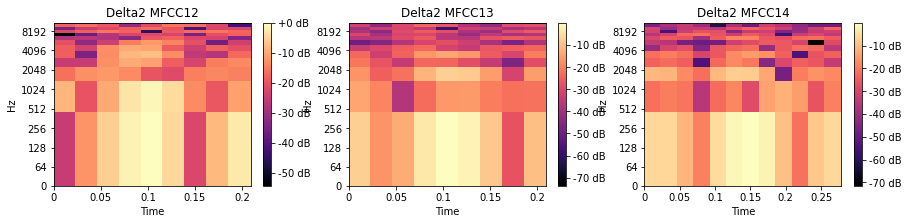

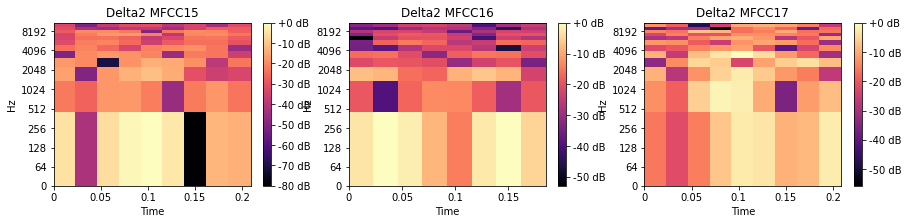

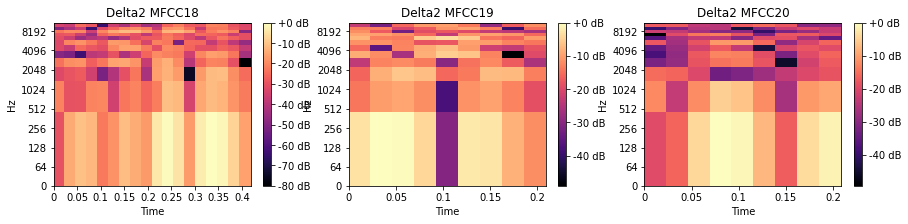

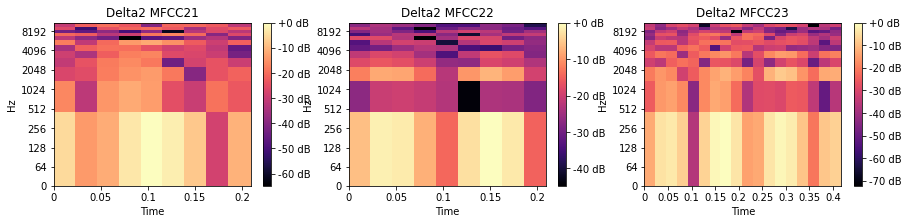

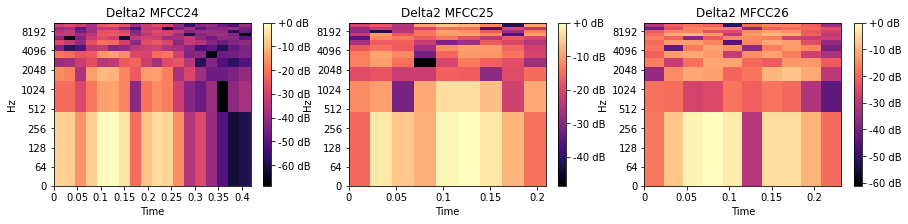

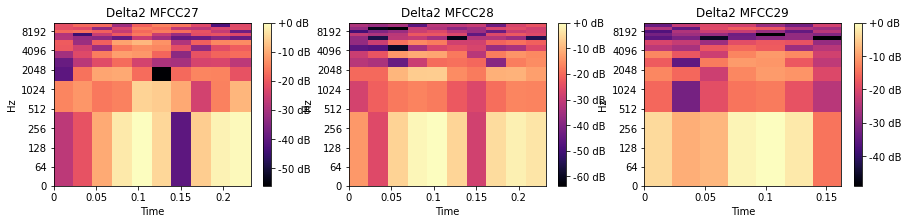

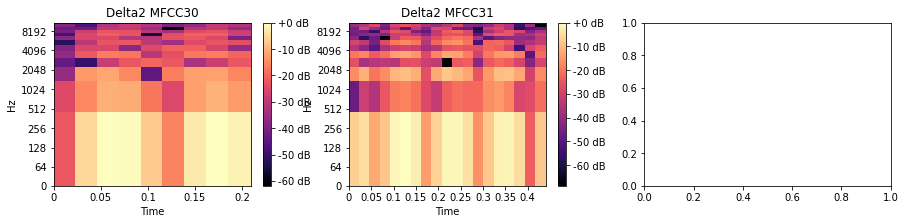

In [3]:
def draw_specs(spec_list, name):
    for stft in range(0, len(spec_list), 3):
        fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,3))
        img1 = librosa.display.specshow(librosa.amplitude_to_db(spec_list[stft], ref=np.max), y_axis='log', x_axis='time', ax=ax1)
        ax1.set_title(name + str(stft))
        fig.colorbar(img1, ax=ax1, format="%+2.0f dB")
        
        if (stft+1 < len(spec_list)):
            img2 = librosa.display.specshow(librosa.amplitude_to_db(spec_list[stft+1], ref=np.max), y_axis='log', x_axis='time', ax=ax2)
            ax2.set_title(name + str(stft+1))
            fig.colorbar(img2, ax=ax2, format="%+2.0f dB")

        if (stft+2 < len(spec_list)):
            img3 = librosa.display.specshow(librosa.amplitude_to_db(spec_list[stft+2], ref=np.max), y_axis='log', x_axis='time', ax=ax3)
            ax3.set_title(name + str(stft+2))
            fig.colorbar(img3, ax=ax3, format="%+2.0f dB")


In [ ]:
draw_specs(mfccs, "MFCC ")

In [ ]:
draw_specs(delta_mfccs, "Delta MFCC")

In [ ]:
draw_specs(delta2_mfccs, "Delta2 MFCC")